## Error Analysis

### Objective

This notebook analyzes the errors made by the logistic regression baseline
model. The goal is to understand the types of mistakes the model makes and to
identify systematic patterns that limit its performance.

This analysis motivates the transition to more expressive models.

In [2]:
import sys
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

## Load Data

Data is loaded using the same preprocessing pipeline as in previous notebooks.

In [3]:
PROJECT_ROOT = Path("..")
sys.path.insert(0, str(PROJECT_ROOT))

from src.data import load_train_test

In [4]:
DATA_DIR = PROJECT_ROOT / "data"
X_train, y_train, X_test, y_test = load_train_test(DATA_DIR)

## Prepare Data for Baseline Model

Images are flattened to match the input requirements of logistic regression.

In [5]:
n_train, h, w = X_train.shape
n_test = X_test.shape[0]

X_train_flat = X_train.reshape(n_train, h * w)
X_test_flat = X_test.reshape(n_test, h * w)

## Train Baseline Model

The logistic regression model is retrained to ensure a clean and reproducible
analysis.

In [6]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_flat, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

## Generate Predictions and Confusion Matrix

We identify false positives and false negatives based on model predictions.

In [7]:
y_pred = model.predict(X_test_flat)

cm = confusion_matrix(y_test, y_pred)
cm

array([[4983,  421],
       [1234,  540]])

In [8]:
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

(np.int64(4983), np.int64(421), np.int64(1234), np.int64(540))

## Identify Error Indices

False positives correspond to non-happy faces classified as happy.
False negatives correspond to happy faces classified as non-happy.

In [9]:
false_positive_idx = np.where((y_test == 0) & (y_pred == 1))[0]
false_negative_idx = np.where((y_test == 1) & (y_pred == 0))[0]

len(false_positive_idx), len(false_negative_idx)

(421, 1234)

## Visualize False Positives

These samples represent faces predicted as happy despite belonging to the
non-happy class.

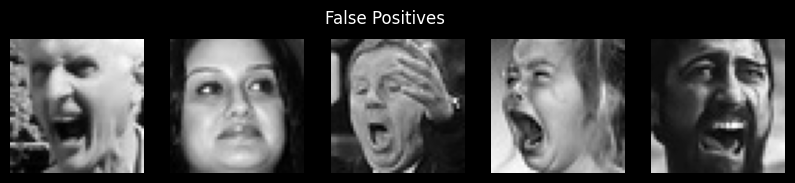

In [10]:
def show_error_samples(indices, title, n=5):
    plt.figure(figsize=(10, 2))
    for i, idx in enumerate(indices[:n]):
        plt.subplot(1, n, i + 1)
        plt.imshow(X_test[idx], cmap="gray")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

show_error_samples(false_positive_idx, "False Positives")

## Visualize False Negatives

These samples represent happy faces that the model failed to detect.

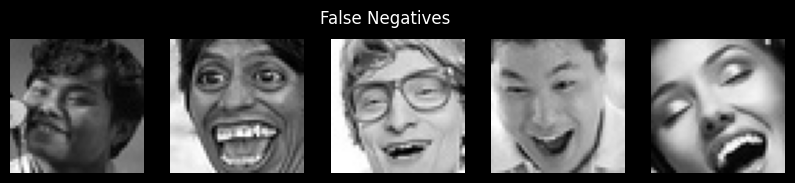

In [11]:
show_error_samples(false_negative_idx, "False Negatives")

## Error Pattern Analysis

By visually inspecting the error cases, we can identify recurring patterns.

## Observations

- False positives often include neutral or surprised expressions with visible
  teeth or raised cheeks.
- False negatives frequently involve subtle smiles or low-contrast images.
- The model is sensitive to global intensity patterns rather than localized
  facial features.
- Flattening images removes spatial relationships critical for expression
  recognition.

## Conclusion

The baseline model captures coarse visual cues but fails to model spatial
structure and subtle facial dynamics. These limitations explain the observed
error patterns and justify the use of models that preserve spatial information
in subsequent stages.